In [2]:
!wget https://data.cityofnewyork.us/api/views/erm2-nwe9/rows.csv?accessType=DOWNLOAD

zsh:1: no matches found: https://data.cityofnewyork.us/api/views/erm2-nwe9/rows.csv?accessType=DOWNLOAD


In [ ]:
!mv rows.csv?accessType=DOWNLOAD rows.csv

In [ ]:
!head rows.csv

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
55093779,08/13/2022 09:19:11 PM,08/13/2022 10:56:42 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11230,323 WEBSTER AVENUE,WEBSTER AVENUE,OCEAN PARKWAY,EAST    8 STREET,OCEAN PARKWAY,EAST    8 STREET,ADDRESS,BROOKLYN,WEBSTER AVENUE,,Closed,,The Police Department responded to the complaint and took action to fix the cond

In [ ]:
!pip install polars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import polars as pl

# Load the CSV file into a dataframe
df = pl.read_csv(
    "/Users/me/Downloads/311_Service_Requests_from_2010_to_Present.csv",
    infer_schema_length=10000,
)

# Print the first few rows of the dataframe
print(df.head())


shape: (5, 41)
┌────────────┬────────────┬───────────┬────────┬───┬────────────┬──────────┬───────────┬──────────┐
│ Unique Key ┆ Created    ┆ Closed    ┆ Agency ┆ … ┆ Bridge     ┆ Latitude ┆ Longitude ┆ Location │
│ ---        ┆ Date       ┆ Date      ┆ ---    ┆   ┆ Highway    ┆ ---      ┆ ---       ┆ ---      │
│ i64        ┆ ---        ┆ ---       ┆ str    ┆   ┆ Segment    ┆ f64      ┆ f64       ┆ str      │
│            ┆ str        ┆ str       ┆        ┆   ┆ ---        ┆          ┆           ┆          │
│            ┆            ┆           ┆        ┆   ┆ str        ┆          ┆           ┆          │
╞════════════╪════════════╪═══════════╪════════╪═══╪════════════╪══════════╪═══════════╪══════════╡
│ 34247134   ┆ 09/04/2016 ┆ 09/07/201 ┆ DPR    ┆ … ┆ null       ┆ null     ┆ null      ┆ null     │
│            ┆ 02:35:29   ┆ 6         ┆        ┆   ┆            ┆          ┆           ┆          │
│            ┆ PM         ┆ 03:50:31  ┆        ┆   ┆            ┆          ┆         

In [2]:
import duckdb

duckdb.sql(
    "SELECT * FROM read_csv_auto('/Users/me/Downloads/311_Service_Requests_from_2010_to_Present.csv')"
)


┌────────────┬─────────────────────┬───┬────────────────────┬────────────────────┬──────────────────────┐
│ Unique Key │    Created Date     │ … │      Latitude      │     Longitude      │       Location       │
│   int64    │      timestamp      │   │       double       │       double       │       varchar        │
├────────────┼─────────────────────┼───┼────────────────────┼────────────────────┼──────────────────────┤
│   34247134 │ 2016-09-04 14:35:29 │ … │               NULL │               NULL │ NULL                 │
│   34250114 │ 2016-09-05 15:47:42 │ … │               NULL │               NULL │ NULL                 │
│   34249970 │ 2016-09-05 15:56:00 │ … │               NULL │               NULL │ NULL                 │
│   27050693 │ 2014-01-04 14:10:00 │ … │               NULL │               NULL │ NULL                 │
│   34262636 │ 2016-09-07 09:49:51 │ … │               NULL │               NULL │ NULL                 │
│   41686038 │ 2019-02-12 14:57:34 │ … │      

In [3]:
# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

In [4]:
%sql duckdb:////tmp/dbt.duckdb
# %sql duckdb:///path/to/file.db

In [5]:
import duckdb

con = duckdb.connect("/tmp/dbt.duckdb")

con.execute("SELECT * FROM new_york_city_311_calls LIMIT 10").fetchall()


CatalogException: Catalog Error: Table with name new_york_city_311_calls does not exist!
Did you mean "temp.information_schema.tables"?
LINE 1: SELECT * FROM new_york_city_311_calls LIMIT 10
                      ^

In [22]:
duckdb.sql("SHOW TABLES")


AttributeError: 'NoneType' object has no attribute 'show'

In [ ]:
SELECT * FROM read_csv_auto('input.csv');

In [2]:
import polars as pl

# Load the CSV file into a dataframe
df = pl.read_csv(
    "rows.csv", null_values=["N/A", "NA", "UNKNOWN", "90054-0807"], ignore_errors=True
)

# Print the first few rows of the dataframe
print(df.head())


FileNotFoundError: No such file or directory: rows.csv

In [3]:
from matplotlib import pyplot as plt

# Extract the column "complaint_type" to create the histogram
complaint_type = df["complaint_type"]

# Create a histogram plot using matplotlib
plt.hist(complaint_type, bins=50)
plt.xticks(rotation=90)
plt.xlabel("Complaint Type")
plt.ylabel("Count")
plt.title("Histogram of 311 Calls in NYC")
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Load the CSV file into a dataframe
df = pl.read_csv(
    "rows.csv",
    schema=pl.Schema(
        [
            ("Created Date", pl.Date64),
            ("Complaint Type", pl.Utf8),
            ("Incident Zip", pl.Utf8),
            ("City", pl.Utf8),
            ("Status", pl.Utf8),
            ("Resolution Description", pl.Utf8),
        ]
    ),
)

# Replace any empty or whitespace strings with None
df = df.map(lambda col: col.replace("", None), keep=True)


AttributeError: ignored

In [ ]:
!pip install --quiet duckdb
!pip install --quiet jupysql 
!pip install --quiet duckdb-engine
!pip install --quiet pandas
!pip install --quiet matplotlib

In [ ]:
import duckdb
import pandas as pd
# No need to import sqlalchemy or duckdb_engine
#  JupySQL will use SQLAlchemy to auto-detect the driver needed based on your connection string!

# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

In [ ]:
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

In [ ]:
%sql duckdb:///:memory:

In [ ]:
%%sql
INSTALL httpfs;
LOAD httpfs;

""


Downloaded - https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-11.parquet
From https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page 

In [ ]:
%%sql --save short-trips --no-execute
SELECT *
FROM 's3://payless.health/yellow_tripdata_2022-11.parquet'
WHERE trip_distance < 6.3

Skipping execution...


<AxesSubplot:title={'center':"'trip_distance' from 'short-trips'"}, xlabel='trip_distance', ylabel='Count'>

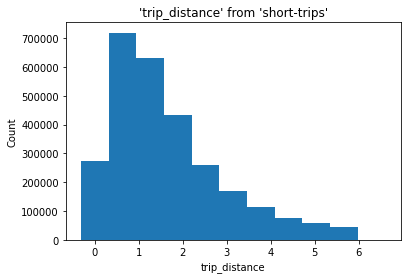

In [ ]:
%sqlplot histogram --table short-trips --column trip_distance --bins 10 --with short-trips

Used a backup! Uploaded the csv amazon s3: s3://payless.health/311_Service_Requests_from_2010_to_Present.csv

In [ ]:
%%sql --save short-trips --no-execute
SELECT *
FROM 's3://payless.health/311_Service_Requests_from_2010_to_Present.csv'
WHERE Latitude < 40.8

Skipping execution...


In [ ]:
%sqlplot histogram --table short-trips --column Latitude --bins 10 --with short-trips

FloatProgress(value=0.0, layout=Layout(width='100%'), style=ProgressStyle(bar_color='black'))

In [ ]:
%%sql --save no-outliers --no-execute
SELECT *
FROM 's3://payless.health/yellow_tripdata_2022-11.parquet'
WHERE Latitude < 40.8

Skipping execution...


<AxesSubplot:title={'center':"'trip_distance' from 'no-outliers'"}, ylabel='trip_distance'>

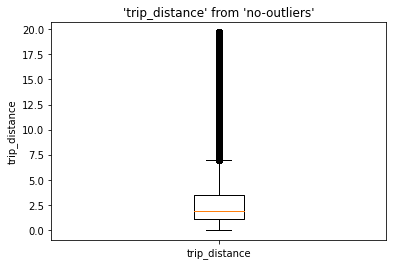

In [ ]:
%sqlplot boxplot --table no-outliers --column trip_distance --with no-outliers

<AxesSubplot:title={'center':"'trip_distance' from 's3://payless.health/yellow_tripdata_2022-11.parquet'"}, ylabel='trip_distance'>

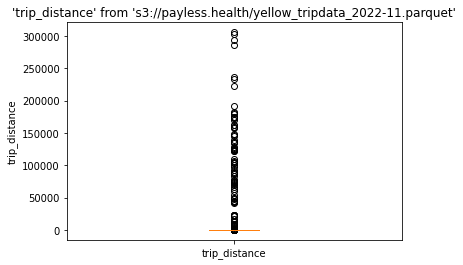

In [ ]:
%sqlplot boxplot --table s3://payless.health/yellow_tripdata_2022-11.parquet --column trip_distance

In [ ]:
N_BINS = 20


In [ ]:
%%sql
SELECT (MAX(trip_distance) - MIN(trip_distance)) / $N_BINS
FROM 's3://payless.health/yellow_tripdata_2022-11.parquet'

/usr/local/lib/python3.9/dist-packages/sql/command.py:108: FutureWarning: Variable substitution with $var and {var} has been deprecated and will be removed in a future version. Use {{var}} instead. To remove this, see: https://jupysql.ploomber.io/en/latest/howto.html#ignore-deprecation-warnings
  warnings.warn(msg, FutureWarning)


,((max(trip_distance) - min(trip_distance)) / 20)
0,15287.818


In [ ]:
%%sql
SELECT
  FLOOR("trip_distance"/BIN_SIZE)* $BIN_SIZE,
  COUNT(*) as count
FROM "s3://payless.health/yellow_tripdata_2022-11.parquet"
GROUP BY 1
ORDER BY 1;

(duckdb.BinderException) Binder Error: Referenced column "BIN_SIZE" not found in FROM clause!
Candidate bindings: "s3://payless.health/yellow_tripdata_2022-11.parquet.extra"
LINE 2:   FLOOR("trip_distance"/BIN_SIZE)*BIN_SIZE,
                                ^
[SQL: SELECT
  FLOOR("trip_distance"/BIN_SIZE)*BIN_SIZE,
  COUNT(*) as count
FROM "s3://payless.health/yellow_tripdata_2022-11.parquet"
GROUP BY 1
ORDER BY 1;]
(Background on this error at: https://sqlalche.me/e/14/f405)


In [ ]:
%sqlplot histogram --table no-outliers --column trip_distance --with no-outliers